# PREDICTING C SECTOIN USING MACHINE LAERNING ALGORITHMS


### IMPORTING THE LIBRARIES AND DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE



%matplotlib inline

In [2]:
data = pd.read_csv("HOSPITAL_DATA.csv")


C:\Users\HARLEEN KAUR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,51,78,90,94,96,114,118,121,122,128,131,132,134,136,137,139) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### DATASET DISCRIPTION

In [3]:
data.head(10)

,AGE,COUPLE_SITUATION,HEIGHT,WEIGHT,BMI,COUNTRY OF ORIGIN,MATERNAL_EDUCATION,START_ANTENATAL_CARE,SUBSTANCE ABUSE,SMOKING,...,SEX FETUS1,WEIGHT FETUS 1,APGAR FETUS 1,APGAR FETUS 1 FIVE MIN,PHVALUEFETUS1UMBILICALARTHERY,EXITUS FETAL FETUS,EXITUS FETAL FETUS 1,FETUS 1 ADMISSION ICU,FETUS 1 RECOVERY,FETUS1 MECONIUM ASPIRATION SYNDROME
0,30,withcouple,1.58,70.0,28.04,CHILE,secondary,1�trimester,f,f,...,Masculino,2640,7,9,7.34,f,no,f,1:Aspiraci�nnasofar�ngea,f
1,38,withcouple,1.61,79.0,30.48,ESPA�A,secondary,1�trimester,f,f,...,Femenino,3040,8,9,7.26,f,no,f,0:noprecisa,f
2,25,withcouple,1.56,72.0,29.59,COLOMBIA,secondary,1�trimester,f,f,...,Femenino,3820,10,10,7.21,f,no,f,0:noprecisa,f
3,31,withcouple,1.62,54.0,20.58,ESPA�A,secondary,1�trimester,f,f,...,Femenino,3390,9,10,7.21,f,no,f,0:noprecisa,f
4,28,withcouple,1.47,51.0,23.60,ESPA�A,secondary,1�trimester,f,f,...,Masculino,3020,8,9,7.17,f,no,f,0:noprecisa,f
5,28,withcouple,1.65,64.0,23.51,REPUBLICACHECA,university,1�trimester,f,f,...,Masculino,2650,9,10,7.23,f,no,f,0:noprecisa,f
6,32,withcouple,1.64,57.5,21.38,ESPA�A,secondary,1�trimester,f,f,...,Femenino,3120,9,10,7.29,f,no,f,0:noprecisa,f
7,31,withcouple,1.54,48.5,20.45,MARRUECOS,Sinestudios,1�trimester,f,f,...,Masculino,3560,9,9,7.21,f,no,f,0:noprecisa,f
8,35,withcouple,1.57,62.0,25.15,BOLIVIA,university,1�trimester,f,f,...,Femenino,3830,9,9,7.09,f,no,f,0:noprecisa,f
9,37,withcouple,1.54,60.5,25.51,ESPA�A,secondary,1�trimester,f,f,...,Femenino,2320,9,10,7.31,f,no,f,0:noprecisa,f


In [4]:
data.tail(10)

,AGE,COUPLE_SITUATION,HEIGHT,WEIGHT,BMI,COUNTRY OF ORIGIN,MATERNAL_EDUCATION,START_ANTENATAL_CARE,SUBSTANCE ABUSE,SMOKING,...,SEX FETUS1,WEIGHT FETUS 1,APGAR FETUS 1,APGAR FETUS 1 FIVE MIN,PHVALUEFETUS1UMBILICALARTHERY,EXITUS FETAL FETUS,EXITUS FETAL FETUS 1,FETUS 1 ADMISSION ICU,FETUS 1 RECOVERY,FETUS1 MECONIUM ASPIRATION SYNDROME
6147,37,withcouple,1.75,80.0,25.00,ESPA�A,primary,1�trimester,f,f,...,Masculino,3440,9,10,Unknown,f,no,f,0:noprecisa,f
6148,25,withcouple,1.60,55.0,21.00,ESPA�A,secondary,1�trimester,f,f,...,Femenino,3430,9,10,Unknown,f,no,f,0:noprecisa,f
6149,34,withcouple,1.68,62.0,21.00,ESPA�A,university,1�trimester,f,f,...,Masculino,3350,9,10,7.15,f,no,f,0:noprecisa,f
6150,30,withcouple,1.60,53.0,20.00,ESPA�A,primary,1�trimester,f,f,...,Masculino,3385,10,10,Unknown,f,no,f,0:noprecisa,t
6151,25,withcouple,1.61,82.2,20.00,EGIPTO,primary,2�trimester,f,f,...,Femenino,3850,7,9,Unknown,f,no,f,0:noprecisa,t
6152,35,withcouple,1.56,49.0,20.00,ESPA�A,secondary,1�trimester,f,f,...,Masculino,1960,10,10,7.27,f,no,f,0:noprecisa,t
6153,29,withcouple,1.64,59.0,21.51,ESPA�A,secondary,1�trimester,f,f,...,Masculino,3310,9,10,Unknown,f,no,f,0:noprecisa,f
6154,39,withcouple,1.59,64.0,20.00,ESPA�A,secondary,1�trimester,f,f,...,Masculino,3830,8,9,Unknown,f,no,f,0:noprecisa,f
6155,41,withcouple,1.48,50.0,23.28,ESPA�A,primary,1�trimester,f,f,...,Masculino,2810,10,10,Unknown,f,no,f,0:noprecisa,f
6156,32,withcouple,1.65,75.2,24.00,ARGELIA,Sinestudios,1�trimester,f,f,...,Masculino,3160,10,10,Unknown,f,no,f,0:noprecisa,f


In [5]:
data.shape

(6157, 148)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Columns: 148 entries, AGE to FETUS1 MECONIUM ASPIRATION SYNDROME
dtypes: float64(6), int64(10), object(132)
memory usage: 7.0+ MB


In [7]:
data.describe()

,AGE,HEIGHT,WEIGHT,BMI,CIGARRETTES PER DAY,KG INCREASED PREGNANCY,NUMBER_OF_PREV_CESAREAN,PREVIOUS TERM PREGNANCIES,PREVIOUS PRETERM PREGNANCIES,MISCARRIAGES,ALIVE NEW BORNS,PARITY,GESTAGIONAL AGE,CORDOCENTESIS,AMNIOTIC LIQUID EMBOLISM,ARTHERIAL EMBOLIZATION
count,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,0.0,0.0,0.0
mean,31.887932,1.637950,65.713221,25.074579,0.796492,10.580640,0.122949,0.853013,0.036869,0.421796,0.812409,870.500568,39.203508,NaN,NaN,NaN
std,5.416036,2.088081,14.538062,4.930267,2.797068,5.969753,0.365399,0.928396,0.209671,0.783769,0.905217,1067.730564,1.785619,NaN,NaN,NaN
min,14.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,NaN,NaN,NaN
25%,28.000000,1.580000,57.000000,21.560000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,NaN,NaN,NaN
50%,32.000000,1.620000,63.000000,24.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1001.000000,40.000000,NaN,NaN,NaN
75%,36.000000,1.670000,73.000000,27.580000,0.000000,14.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1011.000000,40.000000,NaN,NaN,NaN
max,49.000000,165.000000,169.000000,59.170000,40.000000,34.000000,3.000000,10.000000,4.000000,11.000000,7.000000,30113.000000,43.000000,NaN,NaN,NaN


In [8]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ', '_')
data.head()

,AGE,COUPLE_SITUATION,HEIGHT,WEIGHT,BMI,COUNTRY_OF_ORIGIN,MATERNAL_EDUCATION,START_ANTENATAL_CARE,SUBSTANCE_ABUSE,SMOKING,...,SEX_FETUS1,WEIGHT_FETUS_1,APGAR_FETUS_1,APGAR_FETUS_1_FIVE_MIN,PHVALUEFETUS1UMBILICALARTHERY,EXITUS_FETAL_FETUS,EXITUS_FETAL_FETUS_1,FETUS_1_ADMISSION_ICU,FETUS_1_RECOVERY,FETUS1_MECONIUM_ASPIRATION_SYNDROME
0,30,withcouple,1.58,70.0,28.04,CHILE,secondary,1�trimester,f,f,...,Masculino,2640,7,9,7.34,f,no,f,1:Aspiraci�nnasofar�ngea,f
1,38,withcouple,1.61,79.0,30.48,ESPA�A,secondary,1�trimester,f,f,...,Femenino,3040,8,9,7.26,f,no,f,0:noprecisa,f
2,25,withcouple,1.56,72.0,29.59,COLOMBIA,secondary,1�trimester,f,f,...,Femenino,3820,10,10,7.21,f,no,f,0:noprecisa,f
3,31,withcouple,1.62,54.0,20.58,ESPA�A,secondary,1�trimester,f,f,...,Femenino,3390,9,10,7.21,f,no,f,0:noprecisa,f
4,28,withcouple,1.47,51.0,23.60,ESPA�A,secondary,1�trimester,f,f,...,Masculino,3020,8,9,7.17,f,no,f,0:noprecisa,f


In [9]:
data["TYPE_OF_BIRTH"].unique()

array(['C-section', 'non C-section'], dtype=object)

In [10]:
data.TYPE_OF_BIRTH.value_counts()

non C-section    5132
C-section        1025
Name: TYPE_OF_BIRTH, dtype: int64

<AxesSubplot:xlabel='TYPE_OF_BIRTH', ylabel='count'>

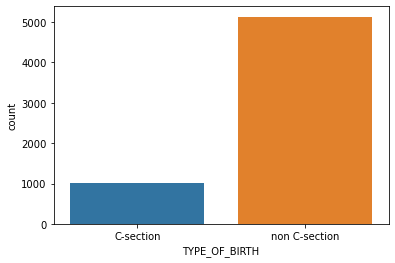

In [11]:
sns.countplot(x='TYPE_OF_BIRTH',data=data)
#highly unbalanced data

### DATA PREPROCESSING

In [12]:
columns=data.columns
for i in columns: 
    print(str(i) + "   " + str(data[i].isnull().sum()))

AGE   0
COUPLE_SITUATION   0
HEIGHT   0
WEIGHT   0
BMI   0
COUNTRY_OF_ORIGIN   0
MATERNAL_EDUCATION   0
START_ANTENATAL_CARE   0
SUBSTANCE_ABUSE   0
SMOKING   0
CIGARRETTES_PER_DAY   0
ALCOHOL   0
DAILY_ALCOHOL_INTAKE   0
KG_INCREASED_PREGNANCY   0
ART   0
ART_MODE   0
AMNIOCENTESIS   0
PREVIOUS_CESAREAN   0
NUMBER_OF_PREV_CESAREAN   0
COMORBIDITY   0
OBSTETRIC_RISK   0
PREVIOUS_TERM_PREGNANCIES   0
PREVIOUS_PRETERM_PREGNANCIES   0
MISCARRIAGES   0
ALIVE_NEW_BORNS   0
PARITY   0
PREINDUCTION   0
INDUCTION   0
HOURS_ROM_BEFORE_INDUCTION   0
ANESTHESIA   0
HOURS_OF_RUPTURED_MEMBRANES_AT_DELIVERY   0
GESTAGIONAL_AGE   0
CARDIOTOCOGRAPHY   0
TYPE_OF_BIRTH   0
EPISIOTOMY   1122
TEAR   2682
MEDICAL_INDICATION   5649
EMERGENCY_CESAREAN_SECTION   5491
PROGRAMMED_CESAREAN_SECTION   5839
OXYTOCIN   0
AMNIOTIC_LIQUID   0
FETAL_INTRAPARTUM_PH   0
COMPLICATIONS   0
ROBSON_GROUP   0
CESAREAN_IN_ACCORDANCE_TO_CLINICAL_STANDARD   5329
COLESTASIS_GRAVIDICA   6051
CORIONAMNIONITIS   6023
NON_ID_GESTATIO

In [13]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

In [14]:
print(numeric_data.shape)
print(categorical_data.shape)

(6157, 16)
(6157, 132)


### FEATURES SELECTED

In [15]:
features=data[['PREVIOUS_CESAREAN','COMPLICATIONS','ROBSON_GROUP','ART_MODE','PREVIOUS_PRETERM_PREGNANCIES','AMNIOCENTESIS','PREINDUCTION','INDUCTION','EPISIOTOMY','OXYTOCIN','FETAL_INTRAPARTUM_PH','PARITY','OBSTETRIC_RISK','COMORBIDITY','NUMBER_OF_PREV_CESAREAN','KG_INCREASED_PREGNANCY','START_ANTENATAL_CARE','ART','PREVIOUS_TERM_PREGNANCIES','AMNIOTIC_LIQUID','MISCARRIAGES','ANESTHESIA','GESTAGIONAL_AGE','HEIGHT','WEIGHT','BMI','AGE','CARDIOTOCOGRAPHY','MATERNAL_EDUCATION','SUBSTANCE_ABUSE','SMOKING','ALCOHOL']]

In [16]:
features.head()

,PREVIOUS_CESAREAN,COMPLICATIONS,ROBSON_GROUP,ART_MODE,PREVIOUS_PRETERM_PREGNANCIES,AMNIOCENTESIS,PREINDUCTION,INDUCTION,EPISIOTOMY,OXYTOCIN,...,GESTAGIONAL_AGE,HEIGHT,WEIGHT,BMI,AGE,CARDIOTOCOGRAPHY,MATERNAL_EDUCATION,SUBSTANCE_ABUSE,SMOKING,ALCOHOL
0,f,f,group2a,NO,0,f,t,t,NaN,t,...,37,1.58,70.0,28.04,30,continuous,secondary,f,f,f
1,f,f,group6,NO,0,f,f,f,NaN,f,...,38,1.61,79.0,30.48,38,continuous,secondary,f,f,f
2,f,f,group1,NO,0,f,f,f,f,t,...,39,1.56,72.0,29.59,25,continuous,secondary,f,f,f
3,t,f,group5,NO,0,f,f,f,f,f,...,40,1.62,54.0,20.58,31,continuous,secondary,f,f,f
4,f,f,group1,FIV,0,f,f,f,f,t,...,41,1.47,51.0,23.60,28,continuous,secondary,f,f,f


In [17]:
for i in features:
    print(str(i) + "   " +str(data[i].unique()))

PREVIOUS_CESAREAN   ['f' 't']
COMPLICATIONS   ['f' 't']
ROBSON_GROUP   ['group2a' 'group6' 'group1' 'group5' 'group3' 'group10' 'group4a'
 'group7' 'group8' 'group9' 'group4b' 'group2b']
ART_MODE   ['NO' 'FIV' 'IAC' 'Ovod�n' 'ICSI' 'IAD']
PREVIOUS_PRETERM_PREGNANCIES   [0 1 4 2 3]
AMNIOCENTESIS   ['f' 't']
PREINDUCTION   ['t' 'f']
INDUCTION   ['t' 'f']
EPISIOTOMY   [nan 'f' 't']
OXYTOCIN   ['t' 'f']
FETAL_INTRAPARTUM_PH   ['f' 't']
PARITY   [    0    10  1001  2002    30  4014  3174  1021  2123  1011  6026  2022
   110  2012  3003  3023    20  2001  1113  5004  1000   100   101    11
  3002  1002     1  3013  5035  2032   111   422   102  4004   222  1111
  2102    40  1031  1101   112   121  2011  1102  1061  1122  2114   232
  5025  1041  3004  5105    50  1051   212  3033  4013  2062  5005   103
  2042  2021  1112  2003  1243  6006  4024  5055  2113  1012  2133  1132
  1010  3022  2000  4003  2202  6016  3053  5015   332  1213   201  3012
   120  1020  1121  6117  1103  1071  2013  

In [18]:
# for i in features:
#     print(i + "      " + str(data[i].isnull().sum()))
features.isnull().sum()

PREVIOUS_CESAREAN                  0
COMPLICATIONS                      0
ROBSON_GROUP                       0
ART_MODE                           0
PREVIOUS_PRETERM_PREGNANCIES       0
AMNIOCENTESIS                      0
PREINDUCTION                       0
INDUCTION                          0
EPISIOTOMY                      1122
OXYTOCIN                           0
FETAL_INTRAPARTUM_PH               0
PARITY                             0
OBSTETRIC_RISK                     0
COMORBIDITY                        0
NUMBER_OF_PREV_CESAREAN            0
KG_INCREASED_PREGNANCY             0
START_ANTENATAL_CARE               0
ART                                0
PREVIOUS_TERM_PREGNANCIES          0
AMNIOTIC_LIQUID                    0
MISCARRIAGES                       0
ANESTHESIA                         0
GESTAGIONAL_AGE                    0
HEIGHT                             0
WEIGHT                             0
BMI                                0
AGE                                0
C

In [19]:
## Missing value Imputation


features['EPISIOTOMY'] = features['EPISIOTOMY'].fillna(value="Missing")
features['EPISIOTOMY'].unique()

<ipython-input-19-e95f783a4d0a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['EPISIOTOMY'] = features['EPISIOTOMY'].fillna(value="Missing")


array(['Missing', 'f', 't'], dtype=object)

In [20]:
print(features['EPISIOTOMY'].groupby(features['EPISIOTOMY']).count())

EPISIOTOMY
Missing    1122
f          3851
t          1184
Name: EPISIOTOMY, dtype: int64


#### ENCODING

In [21]:
numeric = features.select_dtypes(include=[np.number])
categorical = features.select_dtypes(exclude=[np.number])

In [22]:
print("Categorical Columns  :  ")
print("      ")
print(categorical.columns)
print(" ")
print(" ")
print("Numerical Columns  :  ")
print("      ")
print(numeric.columns)

Categorical Columns  :  
      
Index(['PREVIOUS_CESAREAN', 'COMPLICATIONS', 'ROBSON_GROUP', 'ART_MODE',
       'AMNIOCENTESIS', 'PREINDUCTION', 'INDUCTION', 'EPISIOTOMY', 'OXYTOCIN',
       'FETAL_INTRAPARTUM_PH', 'OBSTETRIC_RISK', 'COMORBIDITY',
       'START_ANTENATAL_CARE', 'ART', 'AMNIOTIC_LIQUID', 'ANESTHESIA',
       'CARDIOTOCOGRAPHY', 'MATERNAL_EDUCATION', 'SUBSTANCE_ABUSE', 'SMOKING',
       'ALCOHOL'],
      dtype='object')
 
 
Numerical Columns  :  
      
Index(['PREVIOUS_PRETERM_PREGNANCIES', 'PARITY', 'NUMBER_OF_PREV_CESAREAN',
       'KG_INCREASED_PREGNANCY', 'PREVIOUS_TERM_PREGNANCIES', 'MISCARRIAGES',
       'GESTAGIONAL_AGE', 'HEIGHT', 'WEIGHT', 'BMI', 'AGE'],
      dtype='object')


In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [24]:
for i in categorical:
    features[i]=label_encoder.fit_transform(features[i]) 
    print(str(i) + "     " +str(features[i].unique()))

PREVIOUS_CESAREAN     [0 1]
COMPLICATIONS     [0 1]
ROBSON_GROUP     [ 2  8  0  7  4  1  5  9 10 11  6  3]
ART_MODE     [4 0 1 5 3 2]
AMNIOCENTESIS     [0 1]
PREINDUCTION     [1 0]
INDUCTION     [1 0]
EPISIOTOMY     [0 1 2]
OXYTOCIN     [1 0]
FETAL_INTRAPARTUM_PH     [0 1]
OBSTETRIC_RISK     [1 0]
COMORBIDITY     [0 1]
START_ANTENATAL_CARE     [1 3 5 6 0 2 4]
ART     [0 1]
AMNIOTIC_LIQUID     [2 1 4 3 0]
ANESTHESIA     [1 0]
CARDIOTOCOGRAPHY     [2 3 0 1]
MATERNAL_EDUCATION     [3 4 0 2 1 5]
SUBSTANCE_ABUSE     [0 1]
SMOKING     [0 1]
ALCOHOL     [0 1]


<ipython-input-24-c3fedf41887e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[i]=label_encoder.fit_transform(features[i])


In [25]:
features['TYPE_OF_BIRTH']= data[['TYPE_OF_BIRTH']]

<ipython-input-25-bc34bcde943c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['TYPE_OF_BIRTH']= data[['TYPE_OF_BIRTH']]


In [26]:
features["TYPE_OF_BIRTH"]=features["TYPE_OF_BIRTH"].map({'C-section':1,'non C-section':0}).astype(int)

<ipython-input-26-86964dcb3413>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["TYPE_OF_BIRTH"]=features["TYPE_OF_BIRTH"].map({'C-section':1,'non C-section':0}).astype(int)


In [27]:
features.head()

,PREVIOUS_CESAREAN,COMPLICATIONS,ROBSON_GROUP,ART_MODE,PREVIOUS_PRETERM_PREGNANCIES,AMNIOCENTESIS,PREINDUCTION,INDUCTION,EPISIOTOMY,OXYTOCIN,...,HEIGHT,WEIGHT,BMI,AGE,CARDIOTOCOGRAPHY,MATERNAL_EDUCATION,SUBSTANCE_ABUSE,SMOKING,ALCOHOL,TYPE_OF_BIRTH
0,0,0,2,4,0,0,1,1,0,1,...,1.58,70.0,28.04,30,2,3,0,0,0,1
1,0,0,8,4,0,0,0,0,0,0,...,1.61,79.0,30.48,38,2,3,0,0,0,1
2,0,0,0,4,0,0,0,0,1,1,...,1.56,72.0,29.59,25,2,3,0,0,0,0
3,1,0,7,4,0,0,0,0,1,0,...,1.62,54.0,20.58,31,2,3,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,1.47,51.0,23.60,28,2,3,0,0,0,0


In [28]:
features.head()

,PREVIOUS_CESAREAN,COMPLICATIONS,ROBSON_GROUP,ART_MODE,PREVIOUS_PRETERM_PREGNANCIES,AMNIOCENTESIS,PREINDUCTION,INDUCTION,EPISIOTOMY,OXYTOCIN,...,HEIGHT,WEIGHT,BMI,AGE,CARDIOTOCOGRAPHY,MATERNAL_EDUCATION,SUBSTANCE_ABUSE,SMOKING,ALCOHOL,TYPE_OF_BIRTH
0,0,0,2,4,0,0,1,1,0,1,...,1.58,70.0,28.04,30,2,3,0,0,0,1
1,0,0,8,4,0,0,0,0,0,0,...,1.61,79.0,30.48,38,2,3,0,0,0,1
2,0,0,0,4,0,0,0,0,1,1,...,1.56,72.0,29.59,25,2,3,0,0,0,0
3,1,0,7,4,0,0,0,0,1,0,...,1.62,54.0,20.58,31,2,3,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,1.47,51.0,23.60,28,2,3,0,0,0,0


### Dependent and Independent Variables

In [29]:
X=features.iloc[:,:-1].values
y=features.iloc[:,-1].values

In [30]:
X

array([[0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 8., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 4., ..., 0., 0., 0.]])

In [31]:
y

array([1, 1, 0, ..., 0, 1, 0])

In [32]:
# counter=Counter(y)
# print("Before SMOTE:")
# print(counter)
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
# counter=Counter(y)
# print("After SMOTE:")
# print(counter)

### Decision Tree

In [33]:
# #define the pipeline
# from numpy import mean
# from numpy import std
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold
# trans=StandardScaler()
# over = SMOTE()
# model=DecisionTreeClassifier(criterion='entropy',random_state=42)
# steps=[('t',trans),('o',over),('m',model)]
# pipeline=Pipeline(steps=steps)
# cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# n_scores = cross_val_score(pipeline, X, y, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
# # report pipeline performance
# print('accuracy: %.5f (%.3f)' % (mean(n_scores), std(n_scores)))
    


In [34]:
from numpy import mean
from numpy import std
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

Folds=[3,5,10] #diff k values
criterion=['entropy','gini']  # Diff criterion for DT model
performance=['accuracy','precision','recall','f1_micro','roc_auc']  # Perfromance measures
trans=StandardScaler() #Standardisation
over = SMOTE() #oversampling (SMOTE)

for i in criterion:
    print(" ")
    print("For Criterion: "+str(i))
    #building DT models based on diff hyperparameters
    model=DecisionTreeClassifier(criterion=i,random_state=42)
    #defining steps for training
    steps=[('t',trans),('o',over),('m',model)]
    #creating the pipeline
    pipeline=Pipeline(steps=steps)
    
    for k in Folds:
        print(" ")
        print("For K = "+ str(k))
    
        for i in performance:
            #applying CV
            cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
            #Calculating the scores
            n_scores = cross_val_score(pipeline, X, y, scoring=i, cv=cv, n_jobs=-1, error_score='raise')
            # report pipeline performance
            print(i+': %.5f (%.3f)' % (mean(n_scores), std(n_scores)))

 
For Criterion: entropy
 
For K = 3
accuracy: 0.92919 (0.007)
precision: 0.81007 (0.026)
recall: 0.82340 (0.010)
f1_micro: 0.93308 (0.006)
roc_auc: 0.88431 (0.011)
 
For K = 5
accuracy: 0.93991 (0.007)
precision: 0.79870 (0.019)
recall: 0.83902 (0.016)
f1_micro: 0.93861 (0.005)
roc_auc: 0.89066 (0.018)
 
For K = 10
accuracy: 0.93276 (0.009)
precision: 0.80915 (0.039)
recall: 0.80878 (0.037)
f1_micro: 0.94218 (0.010)
roc_auc: 0.88977 (0.011)
 
For Criterion: gini
 
For K = 3
accuracy: 0.92919 (0.008)
precision: 0.78305 (0.018)
recall: 0.80389 (0.011)
f1_micro: 0.93227 (0.004)
roc_auc: 0.88783 (0.014)
 
For K = 5
accuracy: 0.93422 (0.010)
precision: 0.79651 (0.042)
recall: 0.81268 (0.011)
f1_micro: 0.93276 (0.010)
roc_auc: 0.89232 (0.008)
 
For K = 10
accuracy: 0.93421 (0.013)
precision: 0.79586 (0.028)
recall: 0.80677 (0.038)
f1_micro: 0.93877 (0.010)
roc_auc: 0.88898 (0.014)


In [35]:
# #define the pipeline
# from numpy import mean
# from numpy import std
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold
# trans=StandardScaler()
# over = SMOTE()
# model=DecisionTreeClassifier(criterion='gini',random_state=42)
# steps=[('t',trans),('o',over),('m',model)]
# performance=['accuracy','precision_macro','recall_macro','f1_macro','roc_auc']
# for i in performance:
#     cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#     n_scores = cross_val_score(pipeline, X, y, scoring=i, cv=cv, n_jobs=-1, error_score='raise')
#     # report pipeline performance
#     print(i+': %.5f (%.3f)' % (mean(n_scores), std(n_scores)))

### Random Forest

In [36]:
# from sklearn.ensemble import RandomForestClassifier
# trans=StandardScaler()
# over = SMOTE()
# model= RandomForestClassifier(n_estimators= 20, criterion='gini')  
# steps=[('t',trans),('o',over),('m',model)]
# pipeline=Pipeline(steps=steps)
# performance=['accuracy','precision','recall','f1','roc_auc']
# for i in performance:
#     cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#     n_scores = cross_val_score(pipeline, X, y, scoring=i, cv=cv, n_jobs=-1, error_score='raise')
#     # report pipeline performance
#     print(i+': %.5f (%.3f)' % (mean(n_scores), std(n_scores)))

In [37]:
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

Folds=[3,5,10] #diff k values
gain=['entropy','gini']  
estimators=[20,30,40,50]   #number of estimators
performance=['accuracy','precision','recall','f1_micro','roc_auc']  # Perfromance measures
trans=StandardScaler() #Standardisation
over = SMOTE() #oversampling (SMOTE)

for i in gain:
    for n in estimators:

        print(" ")
        print("For criterion: "+ str(i) +" and n_estimators: "+ str(n))   
        #building DT models based on diff hyperparameters
        model=RandomForestClassifier(n_estimators= n, criterion=i,random_state=42)
        #defining steps for training
        steps=[('t',trans),('o',over),('m',model)]
        #creating the pipeline
        pipeline=Pipeline(steps=steps)
    
        for k in Folds:
            print(" ")
            print("For K = "+ str(k))
    
            for j in performance:
                #applying CV
                cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
                #Calculating the scores
                n_scores = cross_val_score(pipeline, X, y, scoring=j, cv=cv, n_jobs=-1, error_score='raise')
                # report pipeline performance
                print(j+': %.5f (%.3f)' % (mean(n_scores), std(n_scores)))

 
For criterion: entropy and n_estimators: 20
 
For K = 3
accuracy: 0.95176 (0.002)
precision: 0.85336 (0.011)
recall: 0.85366 (0.005)
f1_micro: 0.95030 (0.004)
roc_auc: 0.97976 (0.003)
 
For K = 5
accuracy: 0.95160 (0.005)
precision: 0.85811 (0.020)
recall: 0.86146 (0.005)
f1_micro: 0.95257 (0.004)
roc_auc: 0.98154 (0.003)
 
For K = 10
accuracy: 0.95030 (0.008)
precision: 0.86301 (0.031)
recall: 0.84975 (0.019)
f1_micro: 0.95046 (0.007)
roc_auc: 0.98141 (0.006)
 
For criterion: entropy and n_estimators: 30
 
For K = 3
accuracy: 0.95160 (0.004)
precision: 0.85407 (0.017)
recall: 0.85366 (0.004)
f1_micro: 0.95274 (0.003)
roc_auc: 0.98119 (0.002)
 
For K = 5
accuracy: 0.95322 (0.007)
precision: 0.85544 (0.037)
recall: 0.86146 (0.018)
f1_micro: 0.95111 (0.004)
roc_auc: 0.98251 (0.003)
 
For K = 10
accuracy: 0.95485 (0.008)
precision: 0.85271 (0.034)
recall: 0.85856 (0.020)
f1_micro: 0.95225 (0.008)
roc_auc: 0.98258 (0.005)
 
For criterion: entropy and n_estimators: 40
 
For K = 3
accuracy

### Support Vector Machine

In [38]:
# from sklearn.svm import SVC
# trans=StandardScaler()
# over = SMOTE()
# model= SVC(kernel='linear', random_state=0,degree=1)
# steps=[('t',trans),('o',over),('m',model)]
# pipeline=Pipeline(steps=steps)
# performance=['accuracy','precision_macro','recall_macro','f1','roc_auc']
# for i in performance:
#     cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#     n_scores = cross_val_score(pipeline, X, y, scoring=i, cv=cv, n_jobs=-1, error_score='raise')
#     # report pipeline performance
#     print(i+': %.5f (%.3f)' % (mean(n_scores), std(n_scores)))

In [39]:
from numpy import mean
from numpy import std
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

Folds=[3,5,10] #diff k values
kernel=['linear','rbf','poly']
performance=['accuracy','precision','recall','f1_micro','roc_auc']  # Perfromance measures
trans=StandardScaler() #Standardisation
over = SMOTE() #oversampling (SMOTE)

for i in kernel:
    print(" ")
    print("For kernel: "+i)
    #building DT models based on diff hyperparameters
    model = SVC(kernel=i, random_state=42, degree=1)
    #defining steps for training
    steps=[('t',trans),('o',over),('m',model)]
    #creating the pipeline
    pipeline=Pipeline(steps=steps)
    
    for k in Folds:
        print(" ")
        print("For K = "+ str(k))
    
        for j in performance:
            #applying CV
            cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
            #Calculating the scores
            n_scores = cross_val_score(pipeline, X, y, scoring=j, cv=cv, n_jobs=-1, error_score='raise')
            # report pipeline performance
            print(j+': %.5f (%.3f)' % (mean(n_scores), std(n_scores)))

 
For kernel: linear
 
For K = 3
accuracy: 0.93877 (0.008)
precision: 0.76637 (0.016)
recall: 0.90730 (0.016)
f1_micro: 0.94234 (0.007)
roc_auc: 0.97121 (0.004)
 
For K = 5
accuracy: 0.93974 (0.009)
precision: 0.77390 (0.033)
recall: 0.91220 (0.020)
f1_micro: 0.93714 (0.010)
roc_auc: 0.97148 (0.006)
 
For K = 10
accuracy: 0.93584 (0.010)
precision: 0.77041 (0.041)
recall: 0.90726 (0.029)
f1_micro: 0.93682 (0.012)
roc_auc: 0.97139 (0.007)
 
For kernel: rbf
 
For K = 3
accuracy: 0.94803 (0.004)
precision: 0.80859 (0.023)
recall: 0.89952 (0.008)
f1_micro: 0.94721 (0.005)
roc_auc: 0.97190 (0.002)
 
For K = 5
accuracy: 0.94673 (0.007)
precision: 0.80474 (0.034)
recall: 0.90049 (0.019)
f1_micro: 0.94575 (0.008)
roc_auc: 0.97235 (0.005)
 
For K = 10
accuracy: 0.94591 (0.008)
precision: 0.80274 (0.039)
recall: 0.89464 (0.030)
f1_micro: 0.94543 (0.008)
roc_auc: 0.97358 (0.005)
 
For kernel: poly
 
For K = 3
accuracy: 0.93373 (0.010)
precision: 0.75292 (0.030)
recall: 0.90829 (0.009)
f1_micro: 0

### KNN

In [40]:
# from sklearn.neighbors import KNeighborsClassifier
# trans=StandardScaler()
# over = SMOTE()
# model= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
# steps=[('t',trans),('o',over),('m',model)]
# pipeline=Pipeline(steps=steps)
# performance=['accuracy','precision_macro','recall_macro','f1','roc_auc']
# for i in performance:
#     cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#     n_scores = cross_val_score(pipeline, X, y, scoring=i, cv=cv, n_jobs=-1, error_score='raise')
#     # report pipeline performance
#     print(i+': %.5f (%.3f)' % (mean(n_scores), std(n_scores)))

In [41]:

from numpy import mean
from numpy import std
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

Folds=[3,5,10] #diff k values
performance=['accuracy','precision','recall','f1_micro','roc_auc']  # Perfromance measures
trans=StandardScaler() #Standardisation
over = SMOTE() #oversampling (SMOTE)

for i in range(5,30,5):
    for j in range(1,3):
        print(" ")
        print('Neighbors: '+str(i)+' and p: '+str(j))
        
        #building DT models based on diff hyperparameters
        model = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = j)
     
        #defining steps for training
        steps=[('t',trans),('o',over),('m',model)]
        #creating the pipeline
        pipeline=Pipeline(steps=steps)
    
        for k in Folds:
            print(" ")
            print("For K = "+ str(k))
    
            for j in performance:
                #applying CV
                cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
                #Calculating the scores
                n_scores = cross_val_score(pipeline, X, y, scoring=j, cv=cv, n_jobs=-1, error_score='raise')
                # report pipeline performance
                print(j+': %.5f (%.3f)' % (mean(n_scores), std(n_scores)))

 
Neighbors: 5 and p: 1
 
For K = 3
accuracy: 0.90450 (0.001)
precision: 0.68127 (0.007)
recall: 0.82146 (0.010)
f1_micro: 0.90564 (0.001)
roc_auc: 0.92449 (0.003)
 
For K = 5
accuracy: 0.90661 (0.008)
precision: 0.67846 (0.024)
recall: 0.81561 (0.015)
f1_micro: 0.90888 (0.005)
roc_auc: 0.92542 (0.015)
 
For K = 10
accuracy: 0.90661 (0.009)
precision: 0.68495 (0.025)
recall: 0.80879 (0.038)
f1_micro: 0.90775 (0.008)
roc_auc: 0.92586 (0.017)
 
Neighbors: 5 and p: 2
 
For K = 3
accuracy: 0.87591 (0.003)
precision: 0.59075 (0.011)
recall: 0.84293 (0.021)
f1_micro: 0.87413 (0.005)
roc_auc: 0.91911 (0.004)
 
For K = 5
accuracy: 0.87575 (0.004)
precision: 0.59230 (0.019)
recall: 0.85561 (0.024)
f1_micro: 0.87705 (0.010)
roc_auc: 0.92179 (0.011)
 
For K = 10
accuracy: 0.87754 (0.010)
precision: 0.58933 (0.017)
recall: 0.85852 (0.023)
f1_micro: 0.87608 (0.008)
roc_auc: 0.92497 (0.010)
 
Neighbors: 10 and p: 1
 
For K = 3
accuracy: 0.91506 (0.003)
precision: 0.69348 (0.009)
recall: 0.84098 (0.0

### Naive Bayes 

In [42]:
# from sklearn.naive_bayes import GaussianNB
# trans=StandardScaler()
# over = SMOTE()
# model= GaussianNB()
# steps=[('t',trans),('o',over),('m',model)]
# pipeline=Pipeline(steps=steps)
# performance=['accuracy','precision_macro','recall_macro','f1_macro','roc_auc']
# for i in performance:
#     cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#     n_scores = cross_val_score(pipeline, X, y, scoring=i, cv=cv, n_jobs=-1, error_score='raise')
#     # report pipeline performance
#     print(i+': %.5f (%.3f)' % (mean(n_scores), std(n_scores)))

### AdaBoost

In [43]:
# from sklearn.ensemble import AdaBoostClassifier
# trans=StandardScaler()
# over = SMOTE()
# model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# steps=[('t',trans),('o',over),('m',model)]
# pipeline=Pipeline(steps=steps)
# performance=['accuracy','precision_macro','recall_macro','f1_macro','roc_auc']
# for i in performance:
#     cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#     n_scores = cross_val_score(pipeline, X, y, scoring=i, cv=cv, n_jobs=-1, error_score='raise')
#     # report pipeline performance
#     print(i+': %.5f (%.3f)' % (mean(n_scores), std(n_scores)))

In [44]:
from numpy import mean
from numpy import std
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

Folds=[3,5,10] #diff k values
learning=[0.01,0.05,0.1,0.5,1]  # Diff learning rate
estimators=[20,30,40,50]   #number of estimators
performance=['accuracy','precision','recall','f1_micro','roc_auc']  # Perfromance measures
trans=StandardScaler() #Standardisation
over = SMOTE() #oversampling (SMOTE)

for i in learning:
    for n in estimators:

        print(" ")
        print("For learning rate: "+ str(i) +" and n_estimators: "+ str(n))
        #building DT models based on diff hyperparameters
        model=AdaBoostClassifier(n_estimators=n, base_estimator=RandomForestClassifier(),learning_rate=i, random_state = 100)
        #defining steps for training
        steps=[('t',trans),('o',over),('m',model)]
        #creating the pipeline
        pipeline=Pipeline(steps=steps)
    
        for k in Folds:
            print(" ")
            print("For K = "+ str(k))
    
            for j in performance:
                #applying CV
                cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
                #Calculating the scores
                n_scores = cross_val_score(pipeline, X, y, scoring=j, cv=cv, n_jobs=-1, error_score='raise')
                # report pipeline performance
                print(j+': %.5f (%.3f)' % (mean(n_scores), std(n_scores)))

 
For learning rate: 0.01 and n_estimators: 20
 
For K = 3
accuracy: 0.95241 (0.002)
precision: 0.84823 (0.014)
recall: 0.86829 (0.005)
f1_micro: 0.95176 (0.003)
roc_auc: 0.98336 (0.004)
 
For K = 5
accuracy: 0.95176 (0.006)
precision: 0.84801 (0.021)
recall: 0.86732 (0.016)
f1_micro: 0.95225 (0.005)
roc_auc: 0.98390 (0.003)
 
For K = 10
accuracy: 0.95111 (0.009)
precision: 0.85256 (0.033)
recall: 0.86734 (0.021)
f1_micro: 0.95192 (0.009)
roc_auc: 0.98470 (0.004)
 
For learning rate: 0.01 and n_estimators: 30
 
For K = 3
accuracy: 0.95306 (0.005)
precision: 0.85258 (0.016)
recall: 0.86439 (0.005)
f1_micro: 0.95192 (0.004)
roc_auc: 0.98355 (0.004)
 
For K = 5
accuracy: 0.95371 (0.006)
precision: 0.85217 (0.022)
recall: 0.87024 (0.010)
f1_micro: 0.95274 (0.006)
roc_auc: 0.98379 (0.004)
 
For K = 10
accuracy: 0.95127 (0.010)
precision: 0.85085 (0.028)
recall: 0.86735 (0.031)
f1_micro: 0.95322 (0.009)
roc_auc: 0.98513 (0.004)
 
For learning rate: 0.01 and n_estimators: 40
 
For K = 3
accur

recall: 0.85951 (0.012)
f1_micro: 0.95322 (0.005)
roc_auc: 0.98470 (0.003)
 
For K = 10
accuracy: 0.95273 (0.008)
precision: 0.84864 (0.033)
recall: 0.86440 (0.018)
f1_micro: 0.95225 (0.007)
roc_auc: 0.98481 (0.004)
 
For learning rate: 1 and n_estimators: 40
 
For K = 3
accuracy: 0.95387 (0.004)
precision: 0.85253 (0.015)
recall: 0.86732 (0.001)
f1_micro: 0.95290 (0.005)
roc_auc: 0.98394 (0.004)
 
For K = 5
accuracy: 0.95404 (0.005)
precision: 0.84557 (0.023)
recall: 0.86049 (0.015)
f1_micro: 0.95192 (0.006)
roc_auc: 0.98426 (0.003)
 
For K = 10
accuracy: 0.95338 (0.009)
precision: 0.85124 (0.026)
recall: 0.86244 (0.024)
f1_micro: 0.95192 (0.008)
roc_auc: 0.98508 (0.004)
 
For learning rate: 1 and n_estimators: 50
 
For K = 3
accuracy: 0.95241 (0.004)
precision: 0.84705 (0.016)
recall: 0.86145 (0.009)
f1_micro: 0.95079 (0.004)
roc_auc: 0.98451 (0.004)
 
For K = 5
accuracy: 0.95209 (0.005)
precision: 0.85227 (0.026)
recall: 0.86146 (0.019)
f1_micro: 0.95322 (0.006)
roc_auc: 0.98407 (0.

In [45]:
from numpy import mean
from numpy import std
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

Folds=[3,5,10] #diff k values
learning=[0.01,0.05,0.1,0.5,1]  # Diff learning rate
estimators=[20,30,40,50]   #number of estimators
performance=['accuracy','precision','recall','f1_micro','roc_auc']  # Perfromance measures
trans=StandardScaler() #Standardisation
over = SMOTE() #oversampling (SMOTE)

for i in learning:
    for n in estimators:

        print(" ")
        print("For learning rate: "+ str(i) +" and n_estimators: "+ str(n))
        #building DT models based on diff hyperparameters
        model=AdaBoostClassifier(n_estimators=n, base_estimator=DecisionTreeClassifier(),learning_rate=i, random_state = 100)
        #defining steps for training
        steps=[('t',trans),('o',over),('m',model)]
        #creating the pipeline
        pipeline=Pipeline(steps=steps)
    
        for k in Folds:
            print(" ")
            print("For K = "+ str(k))
    
            for j in performance:
                #applying CV
                cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
                #Calculating the scores
                n_scores = cross_val_score(pipeline, X, y, scoring=j, cv=cv, n_jobs=-1, error_score='raise')
                # report pipeline performance
                print(j+': %.5f (%.3f)' % (mean(n_scores), std(n_scores)))

 
For learning rate: 0.01 and n_estimators: 20
 
For K = 3
accuracy: 0.93325 (0.005)
precision: 0.78566 (0.024)
recall: 0.80777 (0.022)
f1_micro: 0.93357 (0.009)
roc_auc: 0.88587 (0.017)
 
For K = 5
accuracy: 0.93649 (0.009)
precision: 0.78558 (0.035)
recall: 0.81366 (0.011)
f1_micro: 0.93308 (0.008)
roc_auc: 0.88813 (0.014)
 
For K = 10
accuracy: 0.93438 (0.010)
precision: 0.80129 (0.043)
recall: 0.84773 (0.041)
f1_micro: 0.93487 (0.007)
roc_auc: 0.89486 (0.018)
 
For learning rate: 0.01 and n_estimators: 30
 
For K = 3
accuracy: 0.93243 (0.003)
precision: 0.79744 (0.034)
recall: 0.82046 (0.019)
f1_micro: 0.93422 (0.006)
roc_auc: 0.88070 (0.011)
 
For K = 5
accuracy: 0.93097 (0.008)
precision: 0.78889 (0.031)
recall: 0.82439 (0.016)
f1_micro: 0.93520 (0.008)
roc_auc: 0.88247 (0.008)
 
For K = 10
accuracy: 0.93519 (0.011)
precision: 0.79050 (0.039)
recall: 0.82054 (0.042)
f1_micro: 0.93227 (0.008)
roc_auc: 0.88021 (0.017)
 
For learning rate: 0.01 and n_estimators: 40
 
For K = 3
accur

recall: 0.81561 (0.021)
f1_micro: 0.93308 (0.008)
roc_auc: 0.88432 (0.008)
 
For K = 10
accuracy: 0.93600 (0.007)
precision: 0.79169 (0.031)
recall: 0.80191 (0.033)
f1_micro: 0.93145 (0.011)
roc_auc: 0.88851 (0.019)
 
For learning rate: 1 and n_estimators: 40
 
For K = 3
accuracy: 0.92821 (0.005)
precision: 0.76881 (0.011)
recall: 0.81562 (0.006)
f1_micro: 0.93406 (0.007)
roc_auc: 0.88509 (0.017)
 
For K = 5
accuracy: 0.93422 (0.008)
precision: 0.79311 (0.020)
recall: 0.81659 (0.031)
f1_micro: 0.93373 (0.009)
roc_auc: 0.88091 (0.016)
 
For K = 10
accuracy: 0.93584 (0.011)
precision: 0.80847 (0.034)
recall: 0.81849 (0.031)
f1_micro: 0.93324 (0.012)
roc_auc: 0.88791 (0.025)
 
For learning rate: 1 and n_estimators: 50
 
For K = 3
accuracy: 0.93000 (0.005)
precision: 0.77670 (0.013)
recall: 0.82536 (0.008)
f1_micro: 0.93016 (0.009)
roc_auc: 0.88208 (0.005)
 
For K = 5
accuracy: 0.92886 (0.007)
precision: 0.79057 (0.028)
recall: 0.83024 (0.014)
f1_micro: 0.93406 (0.005)
roc_auc: 0.88120 (0.